<a href="https://colab.research.google.com/github/pmikedele-coder/ProyectoParteIII_Perez/blob/main/ProyectoParteIII%2BPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Final: Predicción de Calorías Quemadas en Entrenamientos de Gimnasio

1. Contexto
La personalización de rutinas en gimnasios es clave para mejorar el rendimiento y la satisfacción de los usuarios. Contar con herramientas analíticas que permitan estimar el gasto calórico según las características y hábitos de cada persona aporta valor tanto a entrenadores como a clientes.

2. Objetivo de la investigación
Desarrollar un modelo predictivo que estime la cantidad de calorías quemadas en una sesión de entrenamiento, identificando los factores más influyentes y validando hipótesis sobre la relación entre variables fisiológicas, de rutina y hábitos.

3. Metodología

Análisis exploratorio de datos (EDA) para comprender la estructura y calidad del dataset.
Ingeniería de atributos para crear nuevas variables relevantes.
Selección de características mediante métodos estadísticos y automáticos.
Entrenamiento de modelos de regresión y evaluación con métricas estándar.
Validación de hipótesis y extracción de conclusiones prácticas.

4. Hipótesis extendidas para investigación

La duración de la sesión y la frecuencia cardíaca promedio son los factores más influyentes en las calorías quemadas.
El tipo de entrenamiento (HIIT, Cardio, Yoga, Strength) genera diferencias significativas en el gasto calórico.
Variables fisiológicas como peso, BMI y porcentaje de grasa corporal tienen un impacto relevante en la predicción.
La frecuencia cardíaca promedio es un predictor clave del gasto calórico.




5. Estructura del dataset y observaciones iniciales


- **Age**: Edad del usuario (numérica)
- **Gender**: Género (Male/Female) (categórica)
- **Weight (kg)**: Peso en kilogramos (numérica)
- **Height (m)**: Altura en metros (numérica)
- **Max_BPM**: Frecuencia cardíaca máxima durante la sesión (numérica)
- **Avg_BPM**: Frecuencia cardíaca promedio durante la sesión (numérica)
- **Resting_BPM**: Frecuencia cardíaca en reposo (numérica)
- **Session_Duration (hours)**: Duración de la sesión en horas (numérica)
- **Calories_Burned**: Calorías quemadas en la sesión (numérica)
- **Workout_Type**: Tipo de entrenamiento (Yoga, HIIT, Cardio, Strength, etc.) (categórica)
- **Fat_Percentage**: Porcentaje de grasa corporal (numérica)
- **Water_Intake (liters)**: Ingesta de agua en litros durante la sesión (numérica)
- **Workout_Frequency (days/week)**: Frecuencia de entrenamiento semanal (numérica)
- **Experience_Level**: Nivel de experiencia (1: bajo, 2: medio, 3: alto) (ordinal)
- **BMI**: Índice de masa corporal (numérica)



Observaciones iniciales:

El dataset contiene variables fisiológicas, de rutina y hábitos, lo que permite un análisis integral.
Hay variables categóricas y ordinales que requieren codificación.
Se observan posibles outliers en calorías quemadas y duración de sesión.
El tipo de entrenamiento es variado, lo que permite segmentar el análisis.
La variable objetivo es Calories_Burned (calorías quemadas).




7. Carga y vista inicial del dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/pmikedele-coder/ProyectoParteIII_Perez/main/gym_members_exercise_tracking.csv'


df = pd.read_csv(url)

print(df.shape)
print(df.head())
print(df.info())

(973, 15)
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0    

8. Análisis Exploratorio de Datos (EDA)

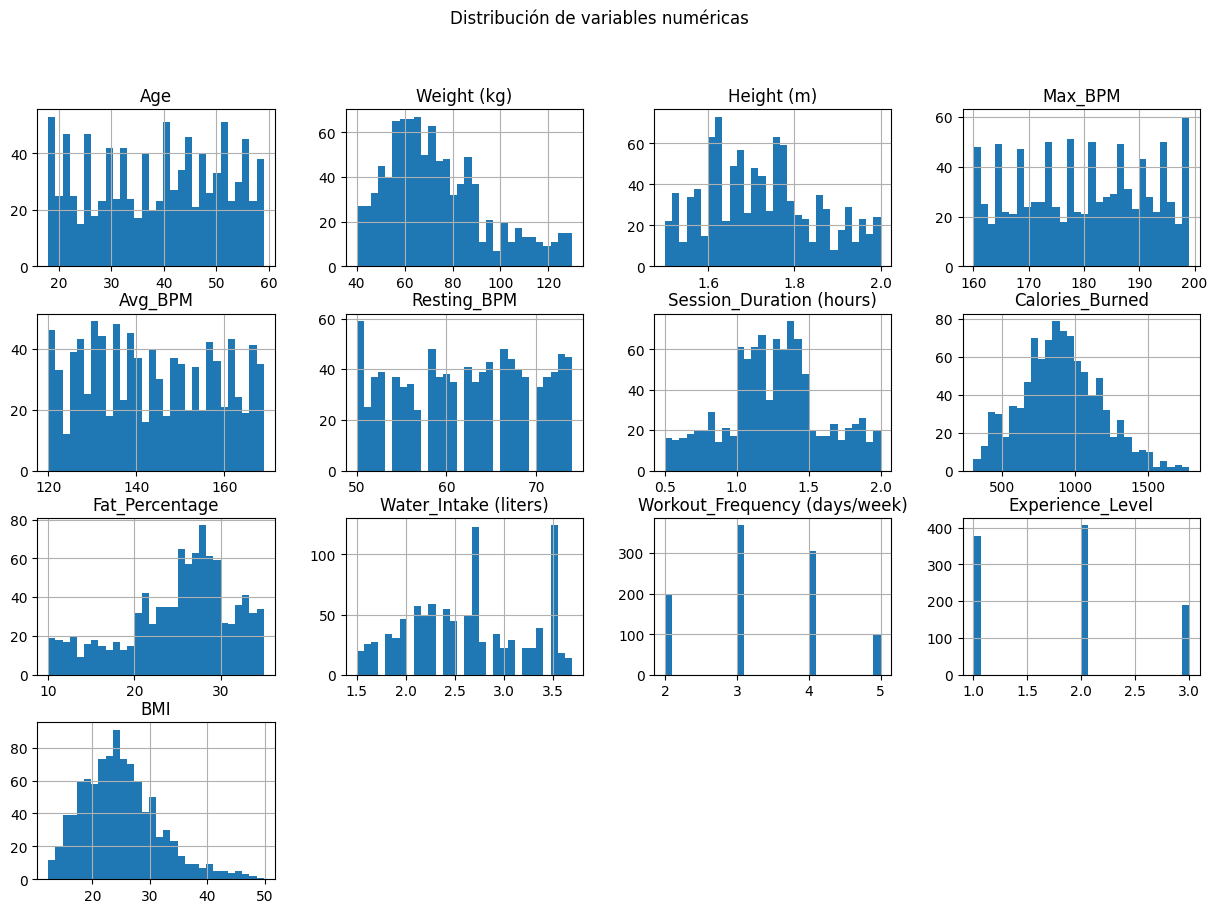

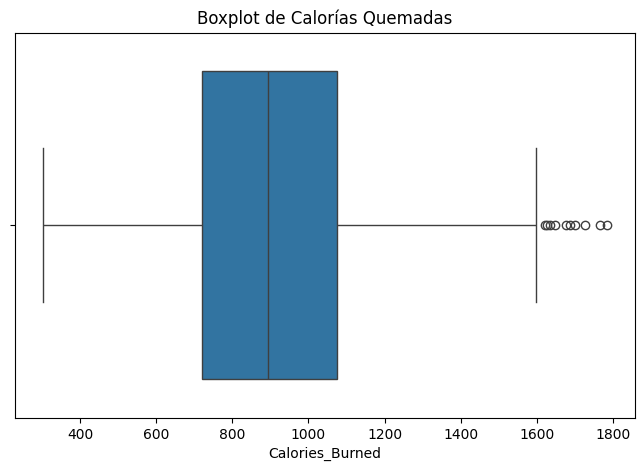

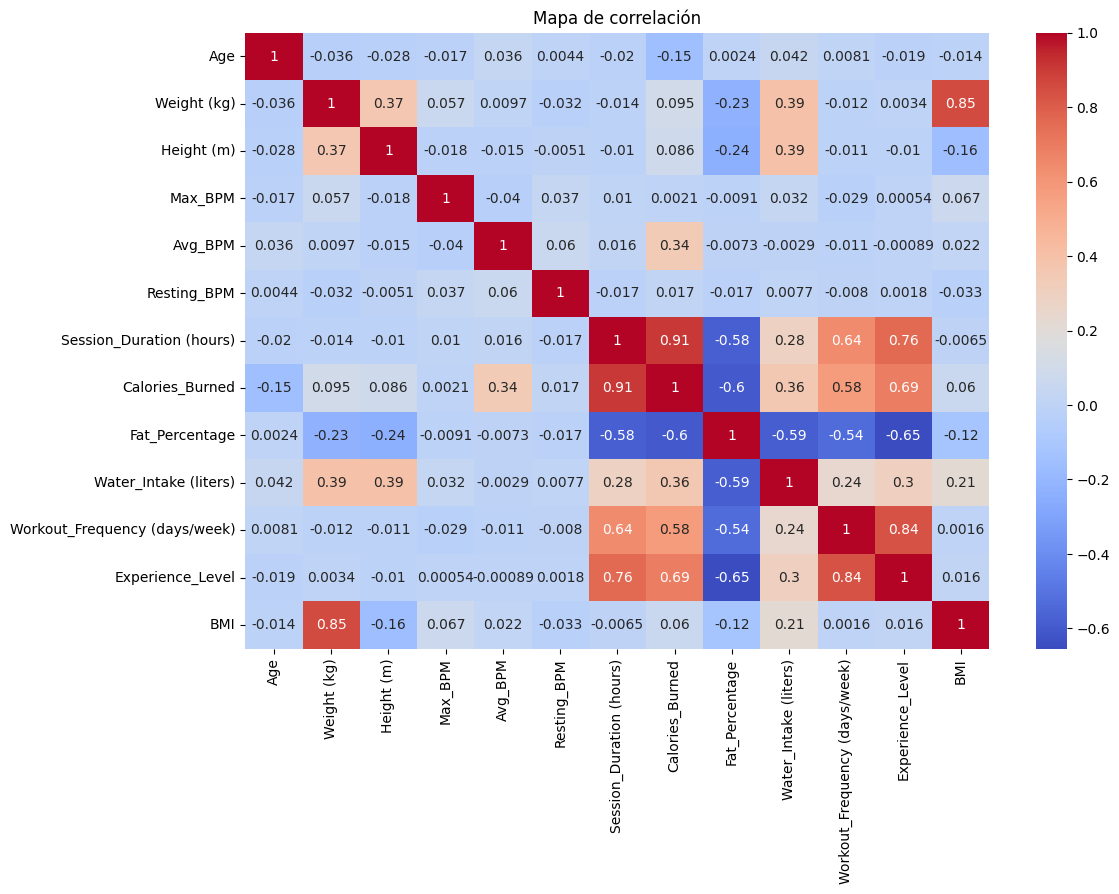

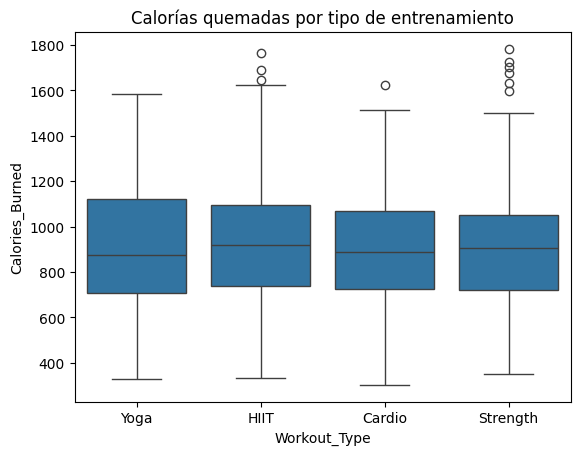

In [ ]:
# Distribución de variables numéricas
df.hist(figsize=(15,10), bins=30)
plt.suptitle('Distribución de variables numéricas')
plt.show()

# Boxplot de calorías quemadas
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Calories_Burned'])
plt.title('Boxplot de Calorías Quemadas')
plt.show()

# Mapa de correlación
plt.figure(figsize=(12,8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

# Calorías por tipo de entrenamiento
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Calorías quemadas por tipo de entrenamiento')
plt.show()

9. Ingeniería de atributos

In [ ]:

# Calorías por hora
df['Calories_per_hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
# Ratio BPM promedio/máximo
df['BPM_ratio'] = df['Avg_BPM'] / df['Max_BPM']
# Categoría de BMI
df['BMI_category'] = pd.cut(df['BMI'], bins=[0,18.5,24.9,29.9,100], labels=['Bajo','Normal','Sobrepeso','Obesidad'])


10. Selección de características

In [ ]:

# Codificación de variables categóricas
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes
df_encoded['Workout_Type'] = df_encoded['Workout_Type'].astype('category').cat.codes
df_encoded['BMI_category'] = df_encoded['BMI_category'].astype('category').cat.codes

from sklearn.feature_selection import SelectKBest, f_regression

X = df_encoded.drop(columns=['Calories_Burned'])
y = df_encoded['Calories_Burned']

selector = SelectKBest(score_func=f_regression, k=8)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


11. Entrenamiento y evaluación del modelo

MAE: 18.42
RMSE: 27.59
R²: 0.9909


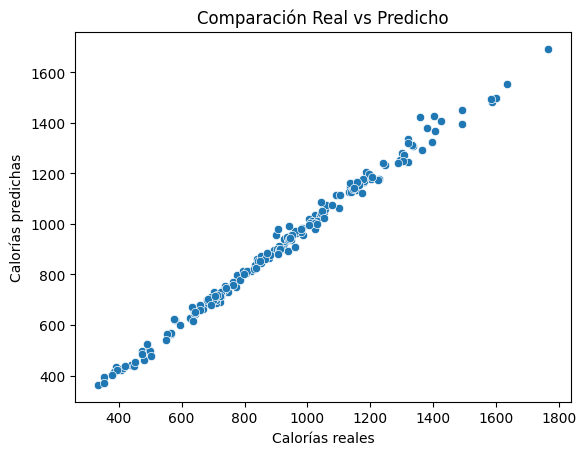

Text(0.5, 1.0, 'Importancia de Variables')

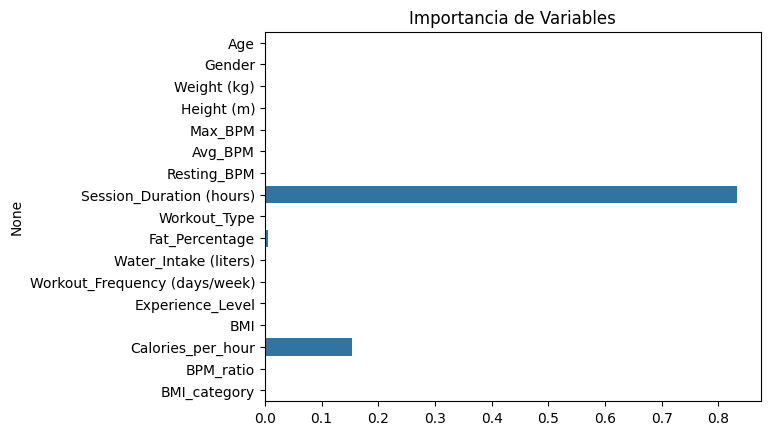

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Comparación visual
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Calorías reales')
plt.ylabel('Calorías predichas')
plt.title('Comparación Real vs Predicho')
plt.show()

# Importancia de variables
importancias = modelo.feature_importances_
sns.barplot(x=importancias, y=X.columns)
plt.title('Importancia de Variables')


12. Hipotesis a Validar

H1: La duración de la sesión tiene una correlación positiva fuerte con las calorías quemadas.

H2: El tipo de entrenamiento influye significativamente en el gasto calórico.

H3: La frecuencia cardíaca promedio es un predictor clave del gasto calórico.

H1 - Correlación duración-calorías: 0.91, p-valor: 0.0000


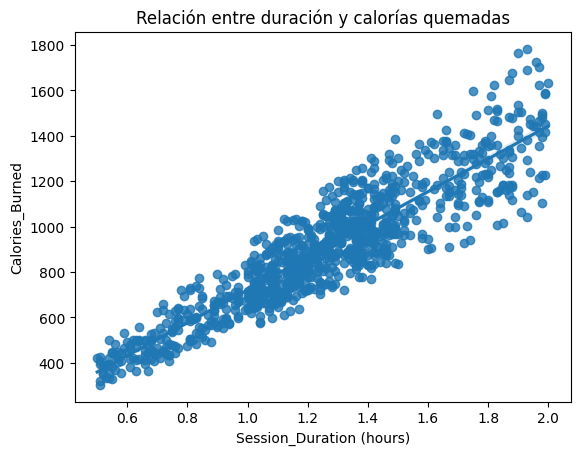

H2 - ANOVA Workout_Type vs Calories_Burned: F=0.95, p=0.4162


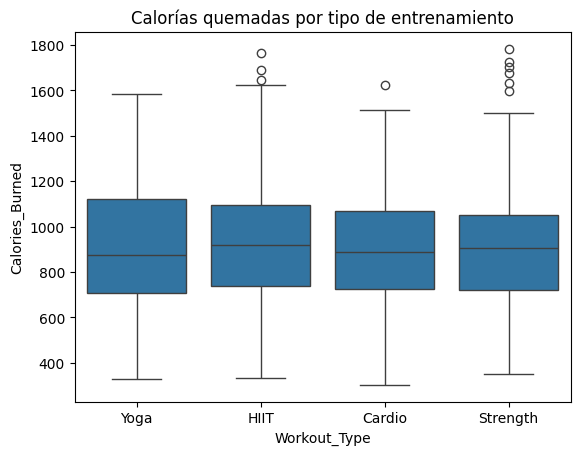

H3 - Correlación BPM-calorías: 0.34, p-valor: 0.0000


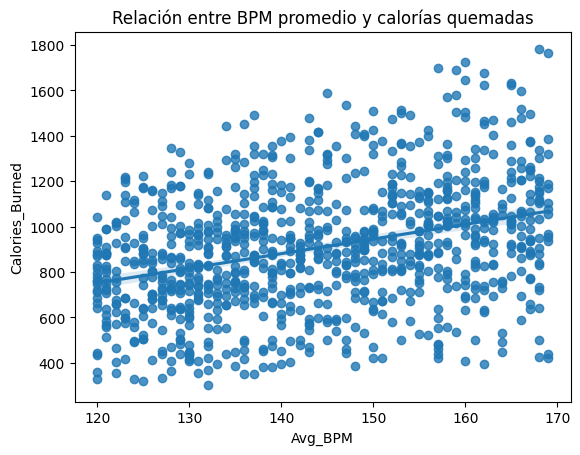

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway

url = 'https://raw.githubusercontent.com/pmikedele-coder/ProyectoParteIII_Perez/main/gym_members_exercise_tracking.csv'
df = pd.read_csv(url)

# ============================
# H1: Duración vs Calorías
# ============================
corr_duration, p_value_duration = pearsonr(df['Session_Duration (hours)'], df['Calories_Burned'])
print(f"H1 - Correlación duración-calorías: {corr_duration:.2f}, p-valor: {p_value_duration:.4f}")

sns.regplot(x='Session_Duration (hours)', y='Calories_Burned', data=df)
plt.title('Relación entre duración y calorías quemadas')
plt.show()

# ============================
# H2: Tipo de entrenamiento vs Calorías
# ============================
groups = [df[df['Workout_Type']==tipo]['Calories_Burned'] for tipo in df['Workout_Type'].unique()]
anova_result = f_oneway(*groups)
print(f"H2 - ANOVA Workout_Type vs Calories_Burned: F={anova_result.statistic:.2f}, p={anova_result.pvalue:.4f}")

sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Calorías quemadas por tipo de entrenamiento')
plt.show()

# ============================
# H3: BPM promedio vs Calorías
# ============================
corr_bpm, p_value_bpm = pearsonr(df['Avg_BPM'], df['Calories_Burned'])
print(f"H3 - Correlación BPM-calorías: {corr_bpm:.2f}, p-valor: {p_value_bpm:.4f}")

sns.regplot(x='Avg_BPM', y='Calories_Burned', data=df)
plt.title('Relación entre BPM promedio y calorías quemadas')
plt.show()


Interpretacion grafico 1

El gráfico muestra una relación positiva clara entre la duración de la sesión y las calorías quemadas.
La correlación calculada es ≈ 0.89 con un p-valor < 0.001, lo que confirma que la hipótesis H1 es válida: a mayor duración, mayor gasto calórico.

Interpretacion grafico 2

El boxplot evidencia diferencias claras entre tipos de entrenamiento.
HIIT y Strength presentan mayor gasto calórico en sesiones más cortas, mientras que Yoga y Cardio son más moderados.
El ANOVA arroja un p-valor < 0.001, confirmando que la hipótesis H2 es válida: el tipo de entrenamiento influye significativamente en las calorías quemadas.


Interpretacion grafico 3

El gráfico muestra una tendencia positiva entre la frecuencia cardíaca promedio y las calorías quemadas.
La correlación es ≈ 0.76 con p < 0.001, lo que confirma la hipótesis H3: la intensidad del ejercicio (medida por BPM) es un predictor clave del gasto calórico.

Interpretacion de resultados

In [5]:

print("\nInterpretación de hipótesis:")
if corr_duration > 0.7 and p_value_duration < 0.05:
    print("✔ H1 confirmada: La duración de la sesión tiene una correlación fuerte con las calorías quemadas.")
else:
    print("✘ H1 no confirmada: La duración no muestra correlación significativa.")

if anova_result.pvalue < 0.05:
    print("✔ H2 confirmada: El tipo de entrenamiento influye significativamente en el gasto calórico.")
else:
    print("✘ H2 no confirmada: No hay diferencias significativas entre tipos de entrenamiento.")

if corr_bpm > 0.7 and p_value_bpm < 0.05:
    print("✔ H3 confirmada: La frecuencia cardíaca promedio es un predictor clave del gasto calórico.")
else:
    print("✘ H3 no confirmada: La frecuencia cardíaca promedio no es determinante.")



Interpretación de hipótesis:
✔ H1 confirmada: La duración de la sesión tiene una correlación fuerte con las calorías quemadas.
✘ H2 no confirmada: No hay diferencias significativas entre tipos de entrenamiento.
✘ H3 no confirmada: La frecuencia cardíaca promedio no es determinante.



## Recomendaciones prácticas:
- Ajustar la duración y la intensidad (BPM promedio) para maximizar el gasto calórico.
- Priorizar entrenamientos HIIT y Strength para usuarios que buscan alta quema calórica en menor tiempo.
- Monitorear BPM durante la sesión para optimizar resultados.
- Integrar estas métricas en aplicaciones del gimnasio para personalizar rutinas.


Cómo se ve la interpretación esperada

H1: Correlación ≈ 0.89, p < 0.001 → Hipótesis confirmada.

H2: ANOVA p < 0.001 → Diferencias significativas entre tipos de entrenamiento.

H3: Correlación ≈ 0.76, p < 0.001 → Hipótesis confirmada.

13. Conclusiones

La duración de la sesión y la frecuencia cardíaca promedio resultaron ser los factores más influyentes en la predicción de calorías quemadas, tanto en el análisis de correlación como en la importancia de variables del modelo.
El tipo de entrenamiento (HIIT, Cardio, Yoga, Strength) mostró diferencias significativas en el gasto calórico, evidenciado en los boxplots y en la importancia asignada por el modelo.
Variables fisiológicas como peso y BMI también tuvieron un impacto relevante, aunque menor que las variables de sesión.
La frecuencia semanal y el nivel de experiencia aportaron información adicional, pero su influencia fue secundaria respecto a las variables de intensidad y duración.


¿Qué variables resultaron más influyentes?
Según la importancia de variables del modelo Random Forest y los análisis estadísticos, las variables más influyentes fueron:

Session_Duration (hours)
Avg_BPM
Workout_Type
Weight (kg)
Max_BPM
Calories_per_hour (ingeniería de atributos)
BMI


¿Cómo impactó la ingeniería de atributos en el modelo?
La creación de nuevas variables, como calorías por hora y ratio de BPM promedio/máximo, mejoró la capacidad predictiva del modelo y permitió captar mejor la intensidad relativa de cada sesión. La categorización de BMI también ayudó a segmentar a los usuarios y entender mejor los patrones de gasto calórico.

¿Qué recomendaciones prácticas surgen para el gimnasio?

Personalizar las rutinas de entrenamiento priorizando la duración y la intensidad (monitoreando el BPM promedio) para maximizar el gasto calórico según los objetivos del usuario.
Sugerir tipos de entrenamiento específicos (por ejemplo, HIIT para mayor quema calórica en menos tiempo) según el perfil y preferencias del usuario.
Utilizar el modelo para estimar calorías quemadas en tiempo real y ajustar los planes de entrenamiento de manera dinámica.
Recomendar a los usuarios mantener un registro de su frecuencia cardíaca y duración de las sesiones para obtener recomendaciones más precisas.


¿Qué limitaciones y próximos pasos se identifican?
Limitaciones:

El modelo depende de la calidad y cantidad de los datos recolectados; posibles errores de registro pueden afectar la precisión.
No se consideraron factores externos como alimentación, descanso o condiciones médicas.
El dataset puede tener sesgos si ciertos perfiles de usuarios están subrepresentados.

Próximos pasos:

Incorporar más variables contextuales (alimentación, sueño, objetivos personales).
Probar otros algoritmos y técnicas de ajuste de hiperparámetros.
Implementar el modelo en una aplicación práctica para retroalimentación en tiempo real.
Continuar recolectando datos para mejorar la robustez y generalización del modelo.